1. Keşifsel Veri Analizi (Exploratory Data Analysis - EDA):
EDA, veri setinin genel yapısını anlamak ve önemli desenleri keşfetmek için yapılan bir dizi işlemdir.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import plotly.express as px

# Veri setini yükleyin
df = pd.read_csv('audi.csv')

#Veri setinin şekli
print("\n##################### Shape #####################")
print(df.shape)

#Veri setinin sütunlarını gösterir
print("\n############################### Columns ##########################################")
print(df.columns)

# Veri setinin genel bilgilerini inceleyin
print("\n##################### Info #####################")
print(df.info())

# İlk birkaç satırını gözden geçirin
print("\n################################## Head ####################################")
print(df.head())

# Son birkaç satırını gözden geçirin
print("\n##################################### Tail #####################################")
print(df.tail())

# Veri tiplerini ve eksik değerleri kontrol edin
print("\n##################### Data Types #####################")
print(df.dtypes)
print("\n##################### Missing Values #####################")
print(df.isnull().sum())

# Temel istatistiksel özetler
print("\n########################################## Describe ##########################################")
print(df.describe().T.to_string())





##################### Shape #####################
(10668, 9)

############################### Columns ##########################################
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

##################### Info #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB
None

#######################

2. Veri Temizleme ve Ön İşleme:
Eksik, bozuk veya gereksiz verilerin tespiti ve düzeltilmesi. Aykırı değerlerin tespiti ve yönetimi de bu aşamada yapılır.

model           0.0
year            0.0
price           0.0
transmission    0.0
mileage         0.0
fuelType        0.0
tax             0.0
mpg             0.0
engineSize      0.0
dtype: float64


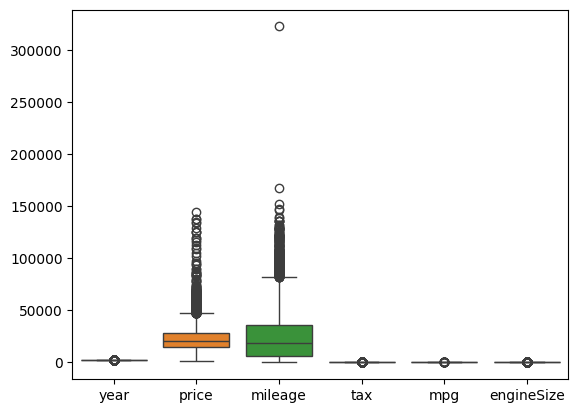

      model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0        A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1        A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
2        A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4
3        A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0
4        A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0
...     ...   ...    ...          ...      ...      ...  ...   ...         ...
10663    A3  2020  16999       Manual     4018   Petrol  145  49.6         1.0
10664    A3  2020  16999       Manual     1978   Petrol  150  49.6         1.0
10665    A3  2020  17199       Manual      609   Petrol  150  49.6         1.0
10666    Q3  2017  19499    Automatic     8646   Petrol  150  47.9         1.4
10667    Q3  2016  15999       Manual    11855   Petrol  150  47.9         1.4

[10096 rows x 9 columns]


In [18]:
# Eksik değerlerin oranını kontrol edin
missing_values = df.isnull().sum() / len(df) * 100
print(missing_values)

# Eksik değerleri doldurun veya satırları/kolonları kaldırın
df.dropna(inplace=True)  # Örneğin eksik değer içeren satırları kaldırma
# ya da df.fillna(df.mean(), inplace=True)  # Ortalama ile doldurma

# Aykırı değerlerin tespiti
sns.boxplot(data=df)
plt.show()

# Aykırı değerleri kaldırma veya değiştirme
# Örneğin, Z-score kullanarak aykırı değer tespiti ve kaldırma
from scipy.stats import zscore
# Sadece sayısal sütunları seçin
numeric_df = df.select_dtypes(include=[np.number])

# Z-score hesaplayın ve aykırı değerleri kaldırın
z_scores = zscore(numeric_df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_clean = df[filtered_entries]

# Temizlenmiş veri çerçevesini yazdır
print(df_clean)


3. Temel İstatistiksel Analizler:
Veri setinin temel istatistiksel özelliklerini ve dağılımını analiz edin.

Mean:
 year           2017.100675
price         22896.685039
mileage       24827.244001
tax             126.011436
mpg              50.770022
engineSize        1.930709
dtype: float64

Median:
 year           2017.0
price         20200.0
mileage       19000.0
tax             145.0
mpg              49.6
engineSize        2.0
dtype: float64

Mode:
 year           2019.0
price         19995.0
mileage        5000.0
tax             145.0
mpg              47.9
engineSize        2.0
Name: 0, dtype: float64

Standard Deviation:
 year              2.167494
price         11714.841888
mileage       23505.257205
tax              67.170294
mpg              12.949782
engineSize        0.602957
dtype: float64

Variance:
 year          4.698029e+00
price         1.372375e+08
mileage       5.524971e+08
tax           4.511848e+03
mpg           1.676968e+02
engineSize    3.635567e-01
dtype: float64


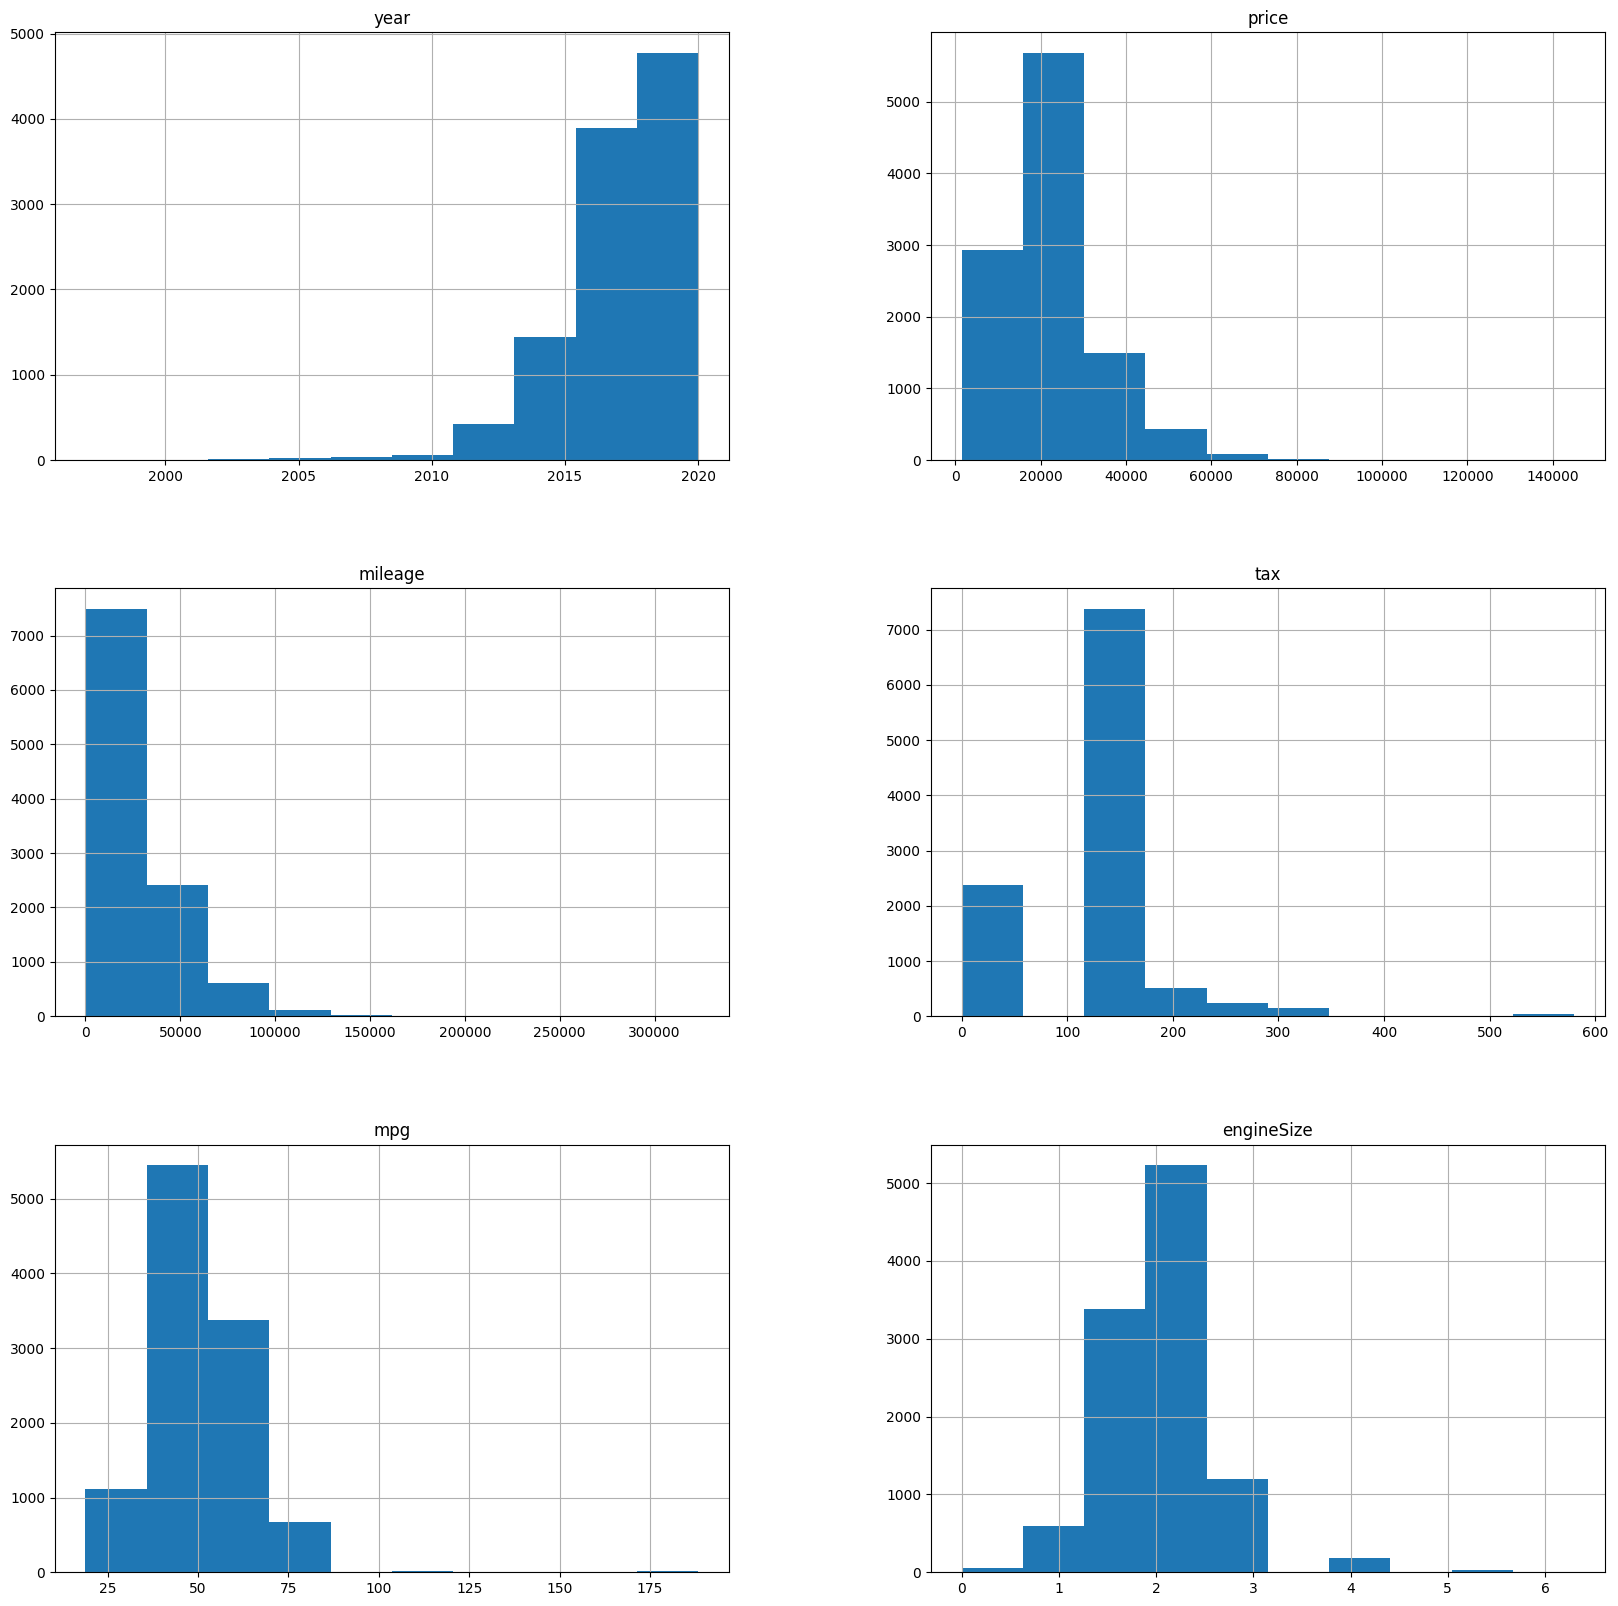

In [19]:
# Sadece sayısal sütunları seçin
numeric_df = df.select_dtypes(include=[np.number])

# Merkezi eğilim ölçümleri
print("Mean:\n", numeric_df.mean())
print("\nMedian:\n", numeric_df.median())
print("\nMode:\n", numeric_df.mode().iloc[0])  # Mode farklı sayıda mod olabilir, bu yüzden ilk satırı alınır

# Dağılım ölçümleri
print("\nStandard Deviation:\n", numeric_df.std())
print("\nVariance:\n", numeric_df.var())

# Veri setinin dağılımını görselleştirme
numeric_df.hist(figsize=(20, 20))
plt.show()

4. Görselleştirme:
Veri setindeki desenleri ve ilişkileri görselleştirme.

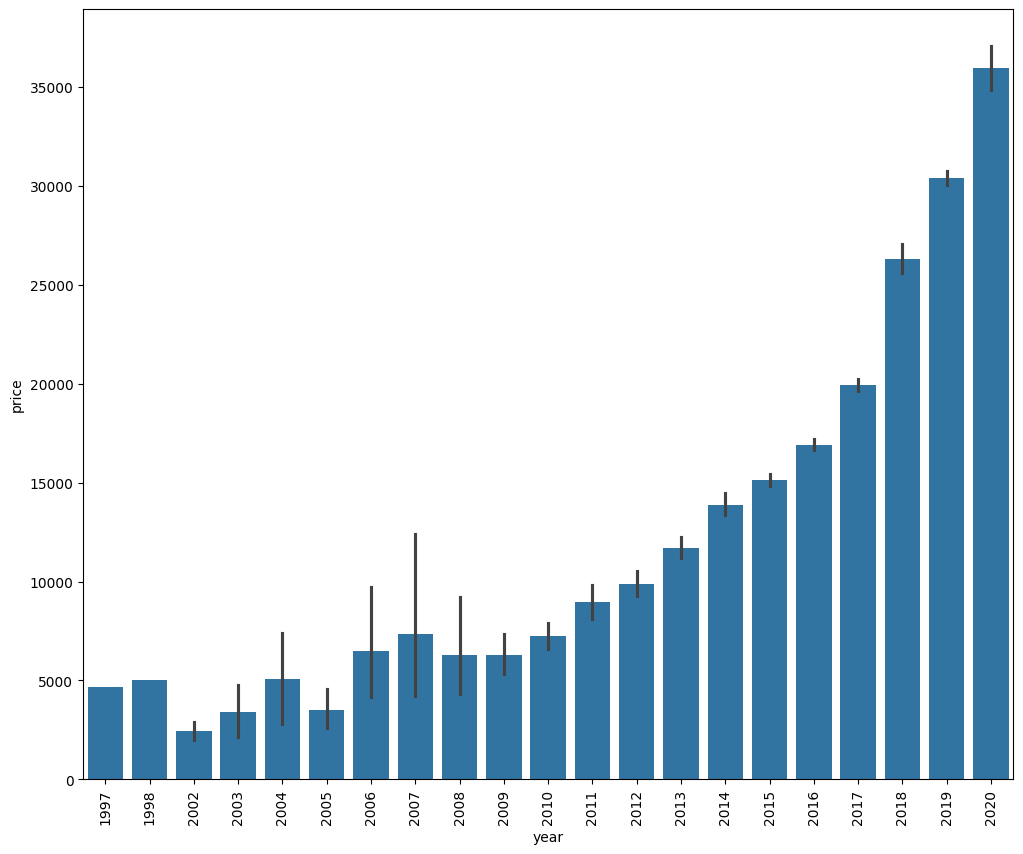

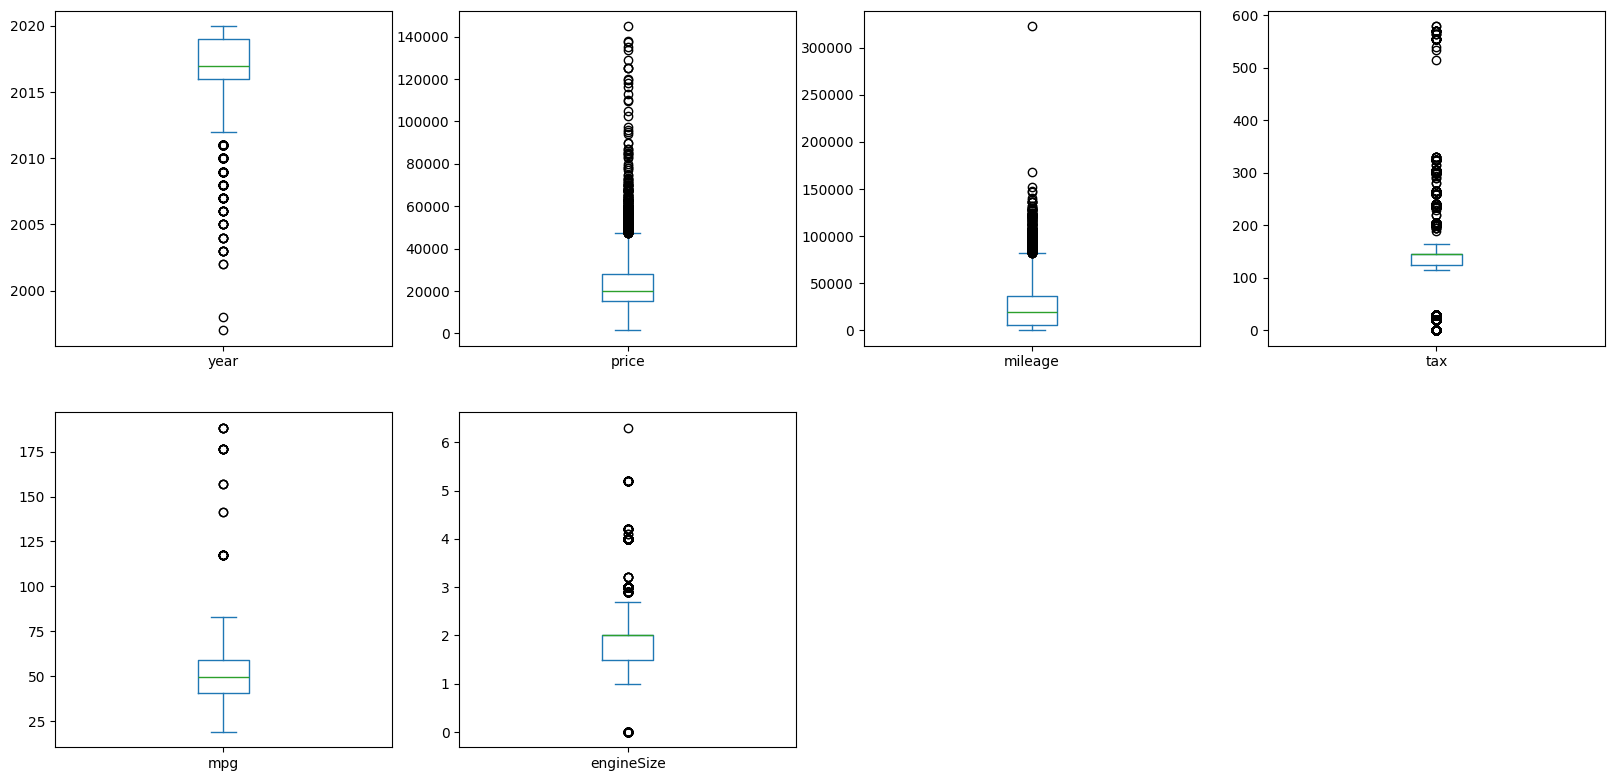

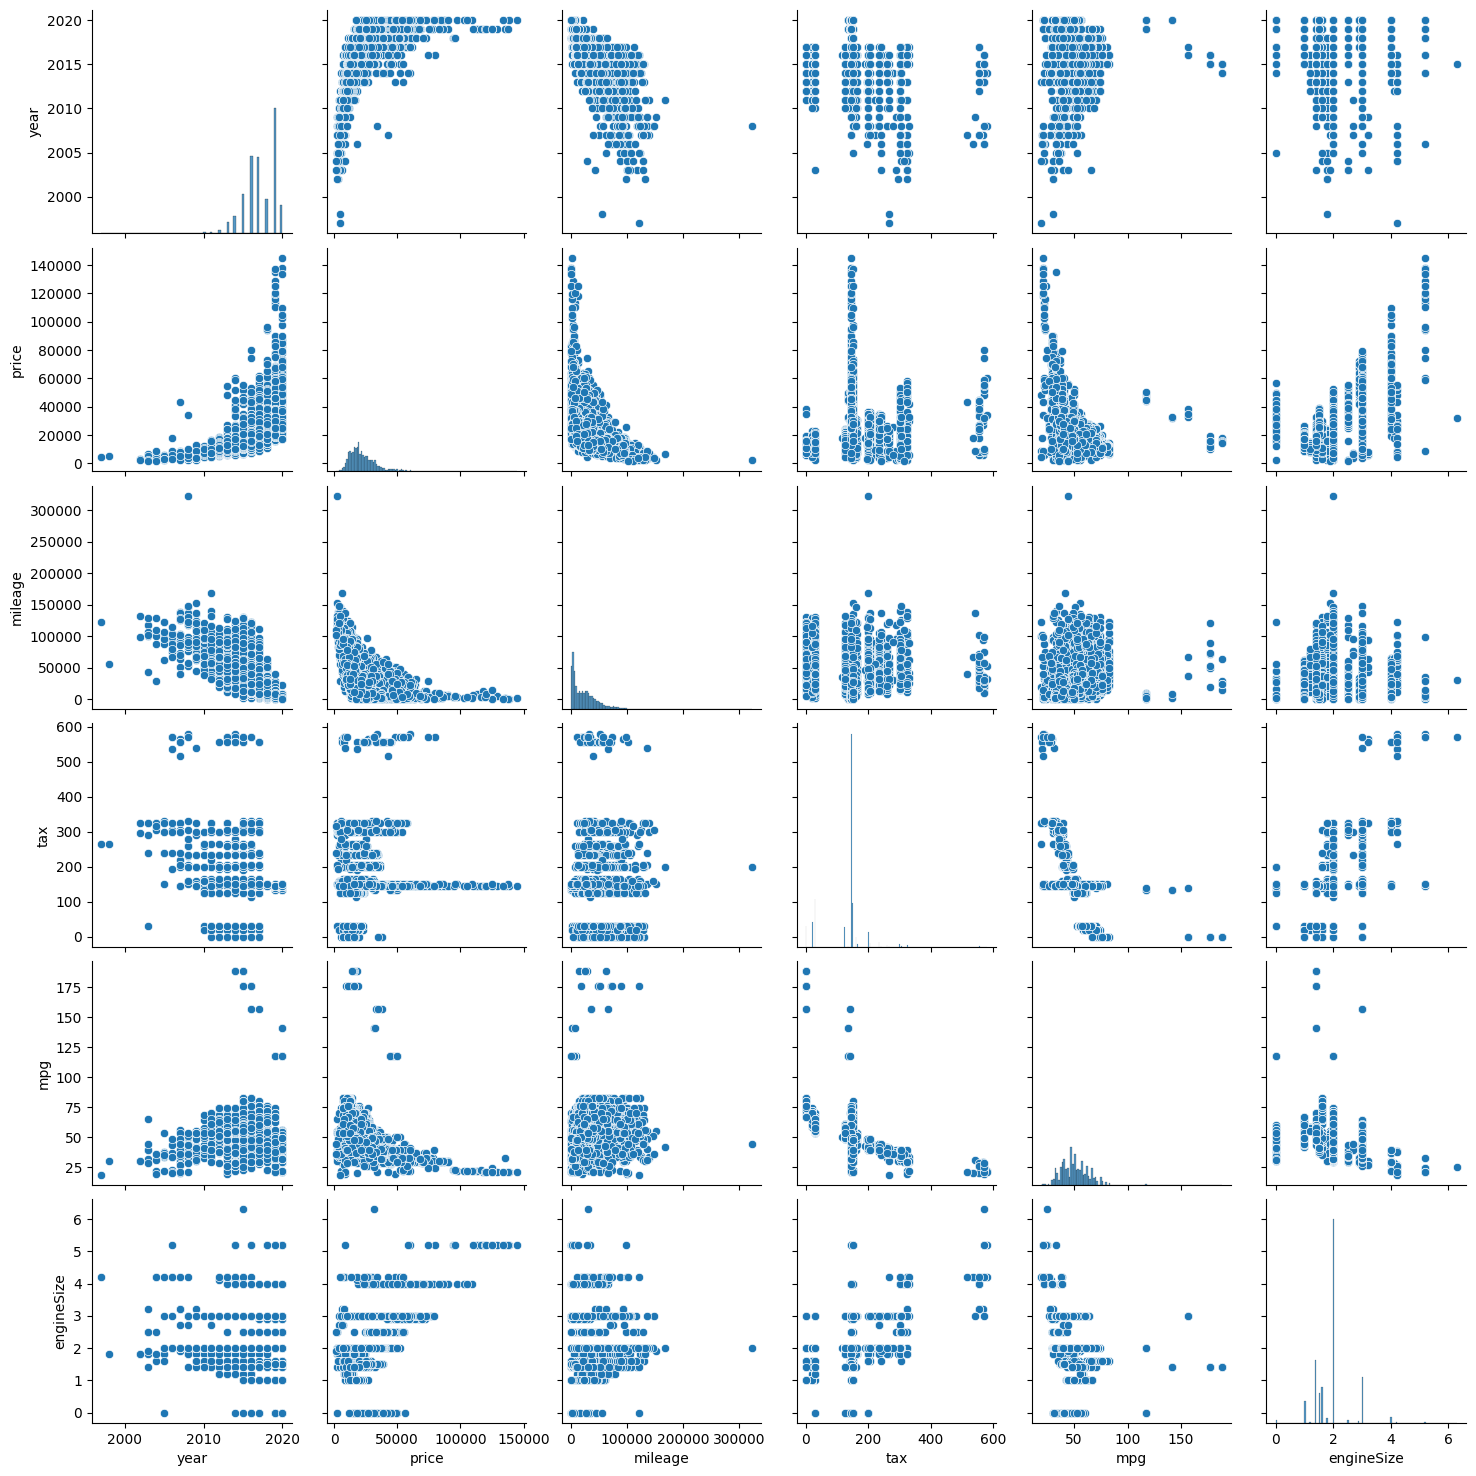

In [20]:
# Histogram
plt.figure(figsize=(12,10))
ax = sns.barplot(x="year", y="price", data=df)
plt.xticks(rotation= 90)


# Kutu grafikleri
df.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False, figsize=(20, 20))
plt.show()

# Scatter plot
sns.pairplot(df)
plt.show()


5. Değişkenler Arası İlişkilerin Analizi:
Değişkenler arasındaki ilişkileri analiz edin. Korelasyon analizi gibi teknikler kullanılır.

                year     price   mileage       tax       mpg  engineSize
year        1.000000  0.592581 -0.789667  0.093066 -0.351281   -0.031582
price       0.592581  1.000000 -0.535357  0.356157 -0.600334    0.591262
mileage    -0.789667 -0.535357  1.000000 -0.166547  0.395103    0.070710
tax         0.093066  0.356157 -0.166547  1.000000 -0.635909    0.393075
mpg        -0.351281 -0.600334  0.395103 -0.635909  1.000000   -0.365621
engineSize -0.031582  0.591262  0.070710  0.393075 -0.365621    1.000000


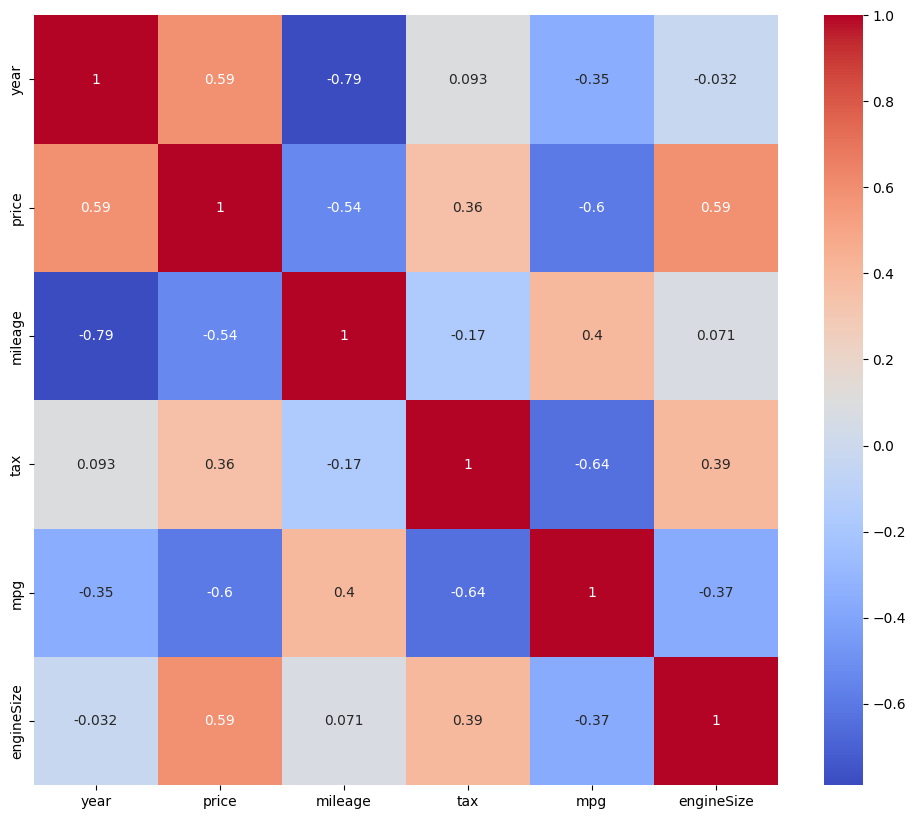

In [21]:
# Korelasyon matrisi
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
print(corr_matrix)

# Isı haritası ile görselleştirme
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


6. Feature Selection (Özellik Seçimi):
Özelliklerin sayısını azaltmak ve modelin performansını artırmak için kullanılan teknikler.

In [22]:
from sklearn.feature_selection import SelectKBest, f_classif

# Örnek: en iyi özellikleri seçmek için SelectKBest kullanma
X = df[['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['transmission']

selector = SelectKBest(score_func=f_classif, k=5)  # Örnek olarak sadece en iyi beş özelliği seçiyoruz
X_new = selector.fit_transform(X, y)

# Seçilen özelliklerin isimlerini elde etme
selected_features = X.columns[selector.get_support()]
print(selected_features)




Index(['year', 'price', 'tax', 'mpg', 'engineSize'], dtype='object')


7. Özellik Mühendisliği (Feature Engineering):
Yeni özellikler oluşturma ve mevcut özellikleri analiz etme.

First Few Rows:
model  year  price transmission  mileage fuelType  tax  mpg  engineSize  year_over_price  year_over_mileage  year_over_tax  year_over_mpg  year_over_engineSize  price_over_year  price_over_mileage  price_over_tax  price_over_mpg  price_over_engineSize  mileage_over_year  mileage_over_price  mileage_over_tax  mileage_over_mpg  mileage_over_engineSize  tax_over_year  tax_over_price  tax_over_mileage  tax_over_mpg  tax_over_engineSize  mpg_over_year  mpg_over_price  mpg_over_mileage  mpg_over_tax  mpg_over_engineSize  engineSize_over_year  engineSize_over_price  engineSize_over_mileage  engineSize_over_tax  engineSize_over_mpg
   A5  2017  20200    Automatic    13057   Petrol  145 53.3         2.0         0.099851           0.154477      13.910345      37.842402           1008.500000        10.014874            1.547063      139.310345      378.986867           10100.000000           6.473475            0.646386         90.048276        244.971857              6528.500000 

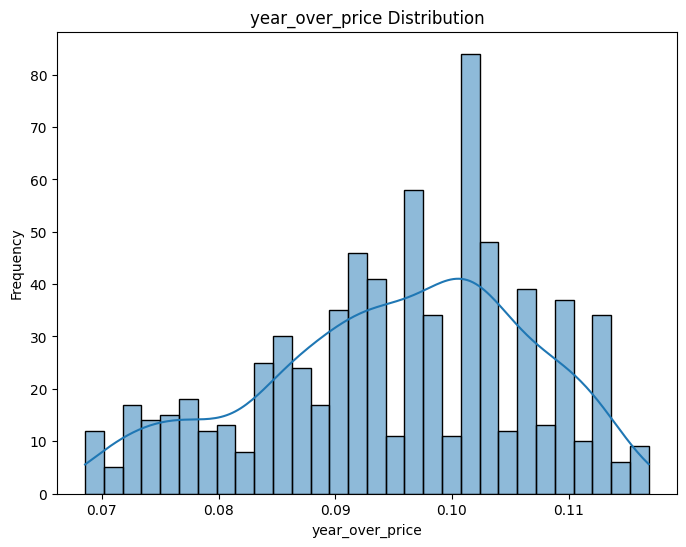

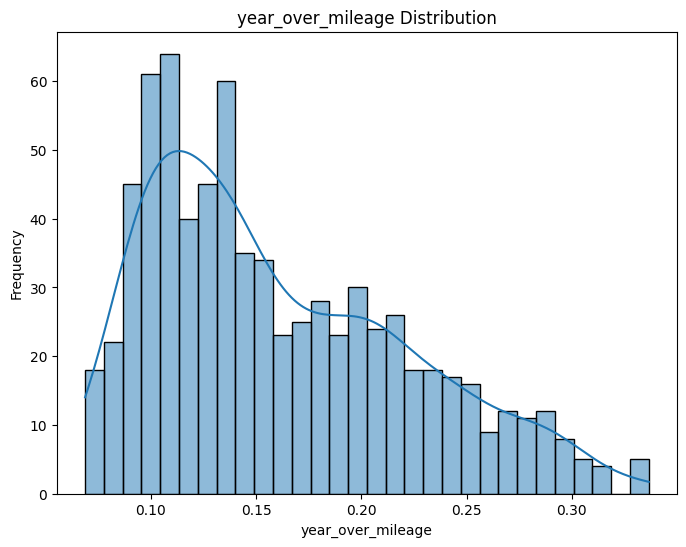

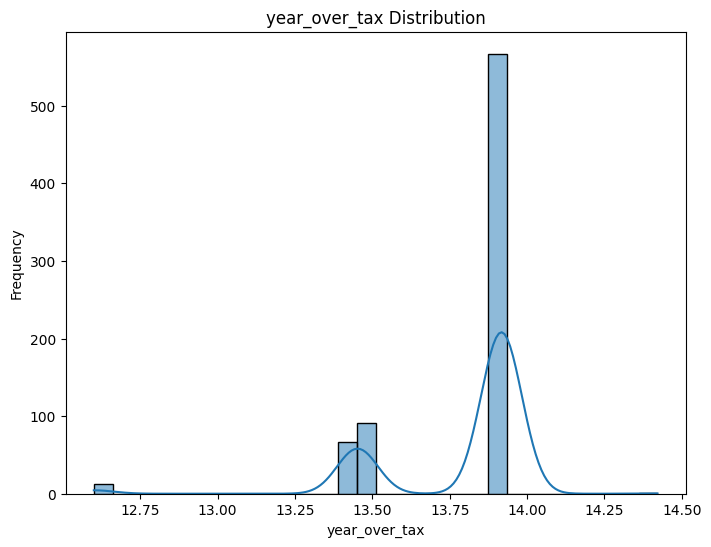

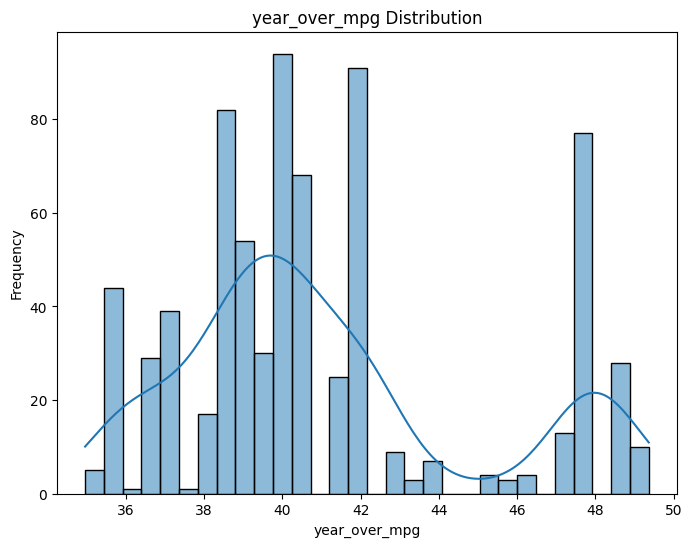

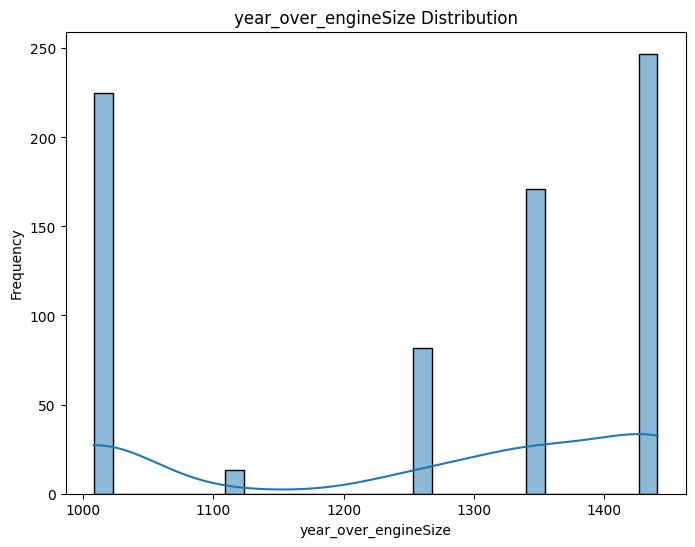

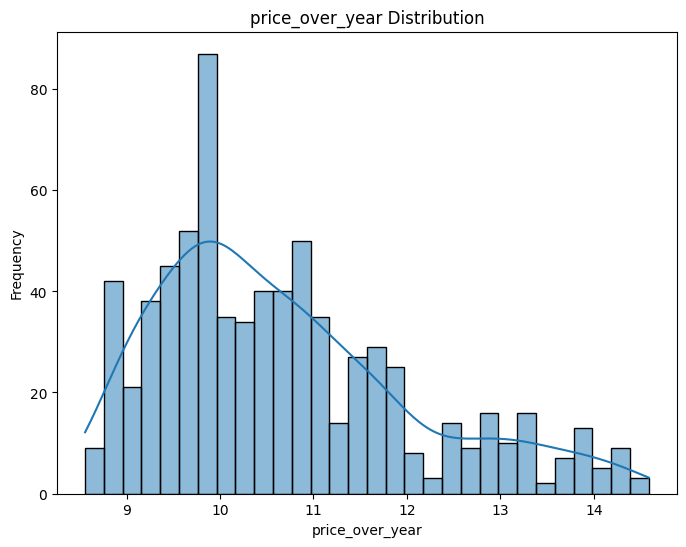

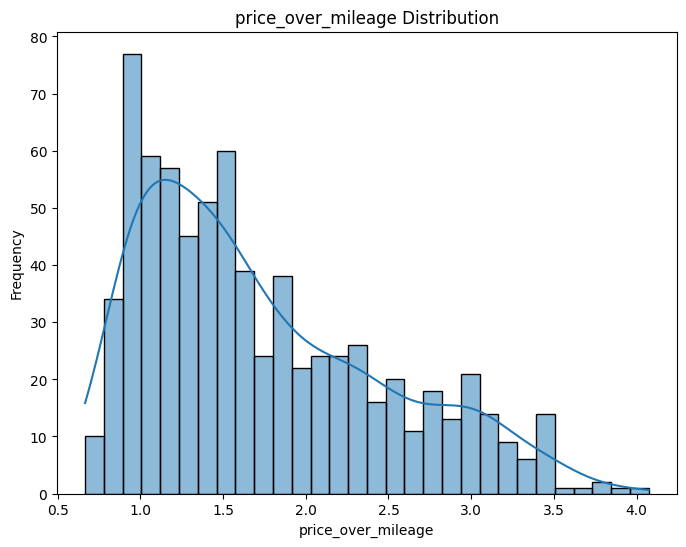

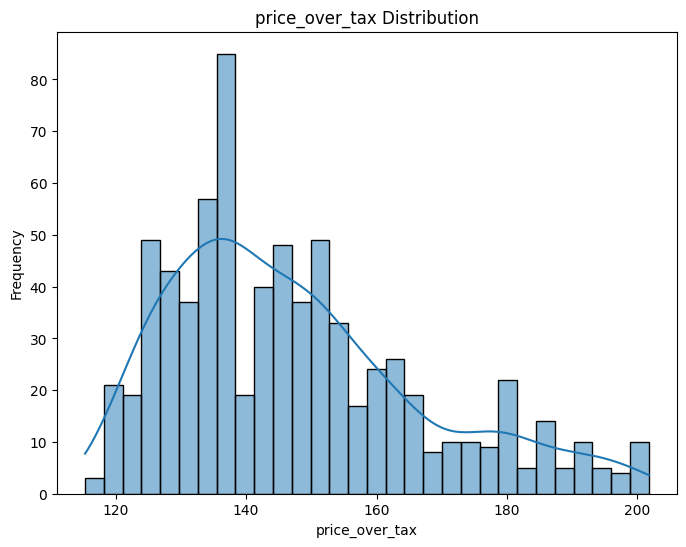

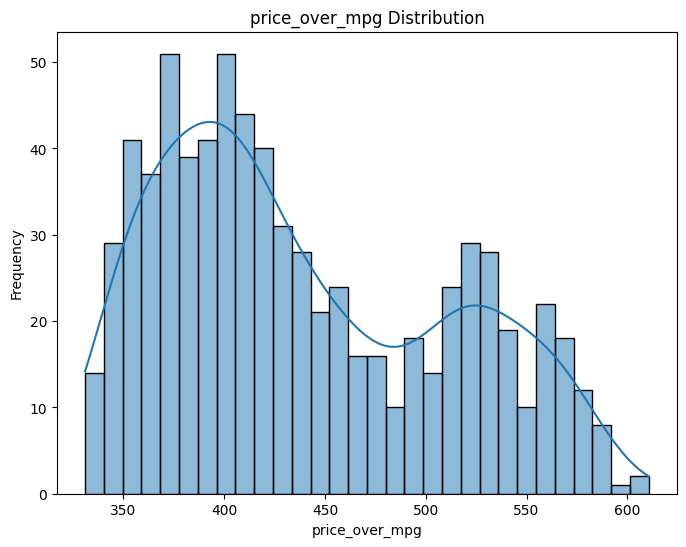

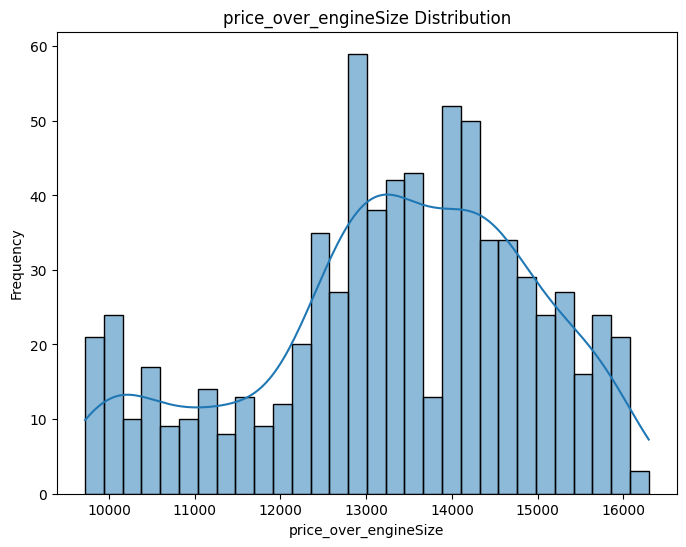

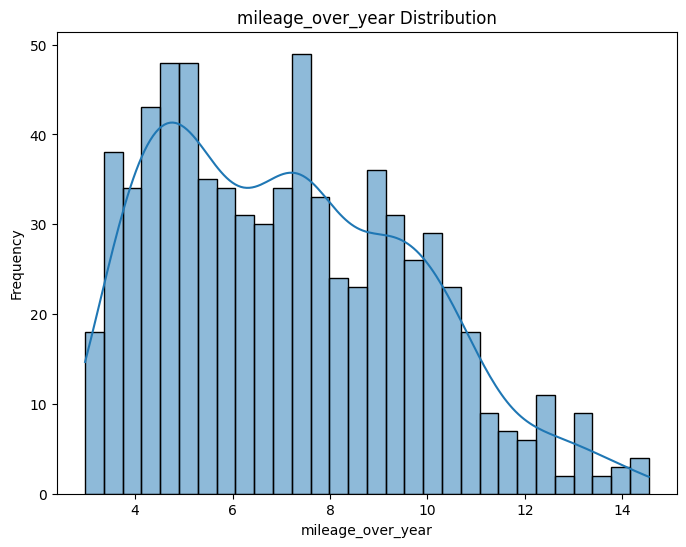

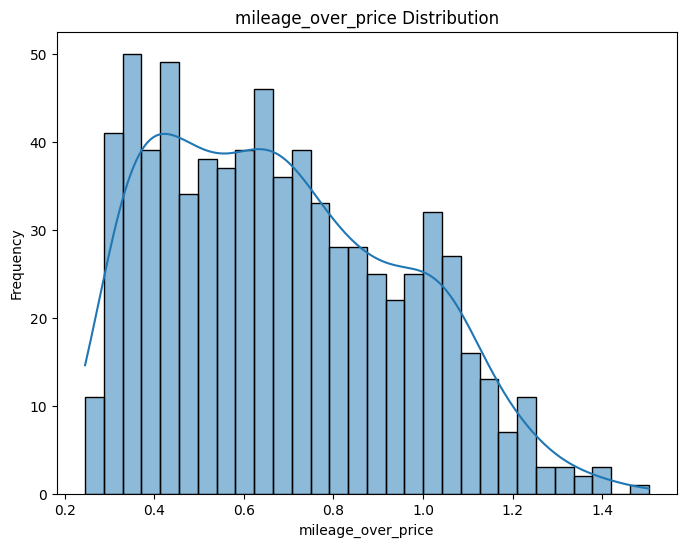

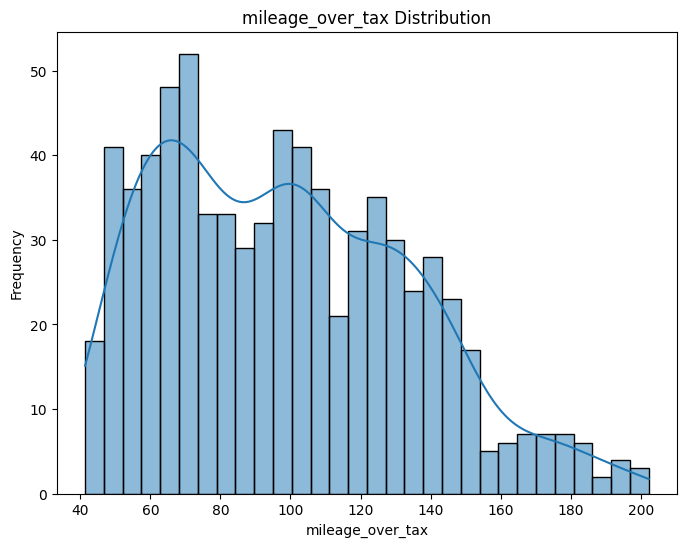

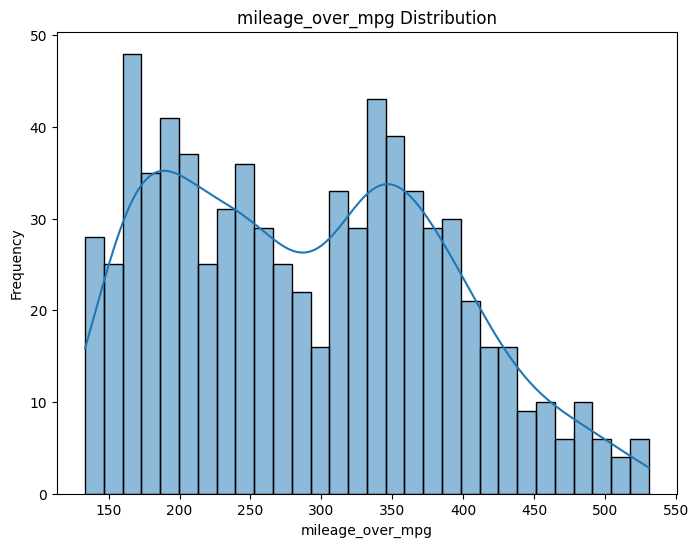

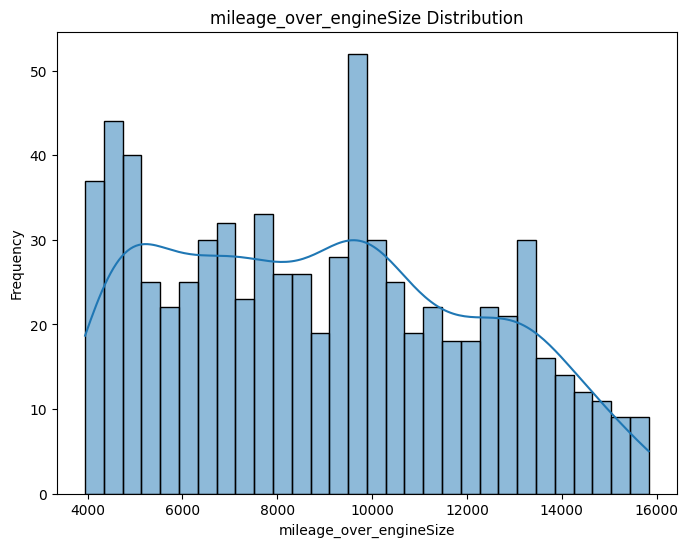

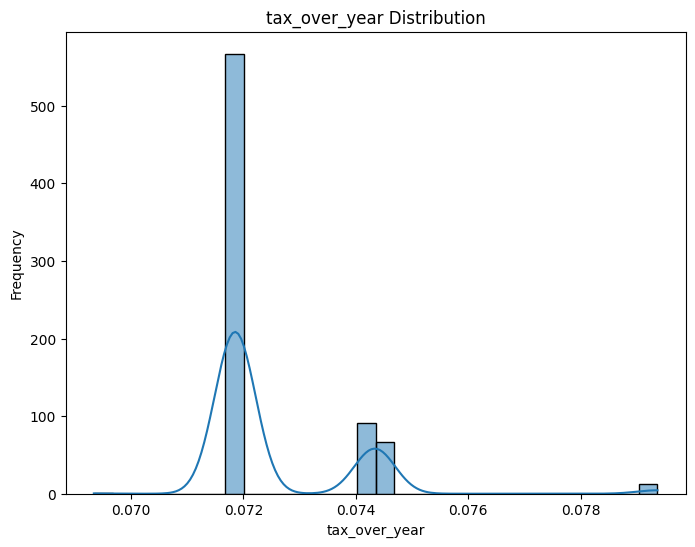

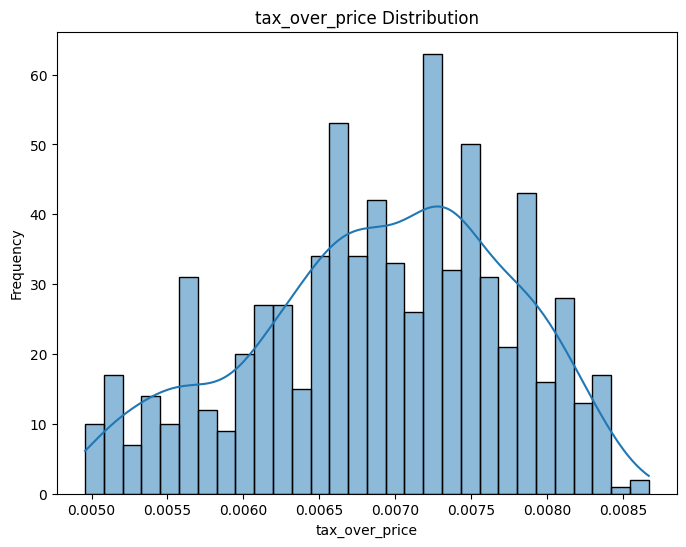

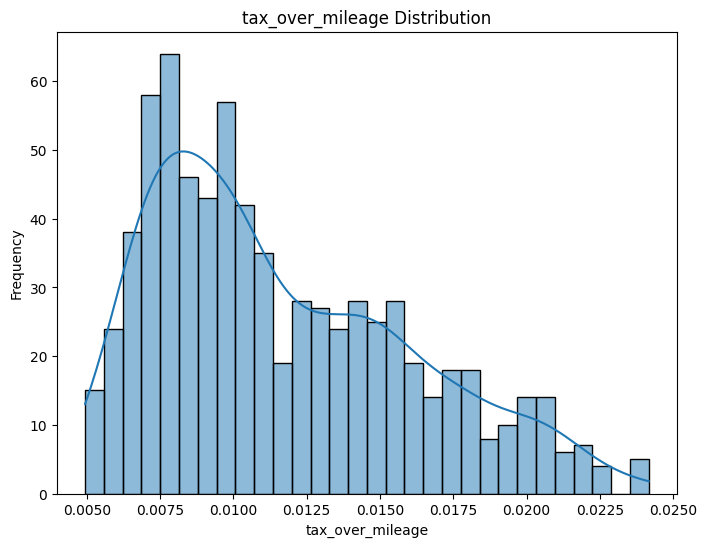

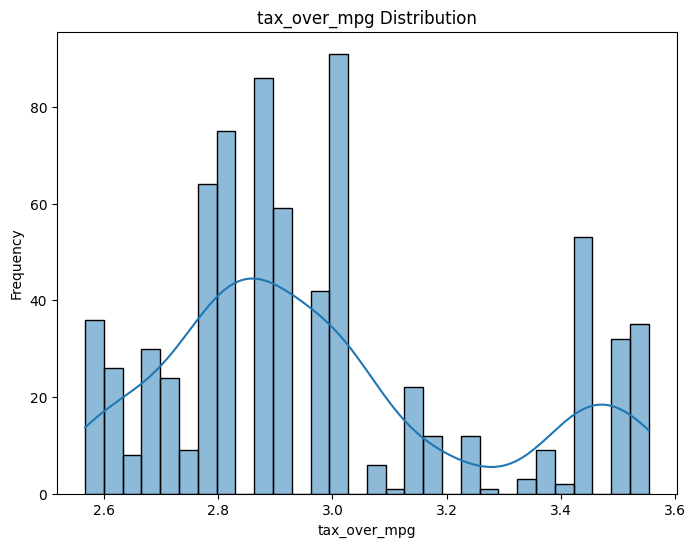

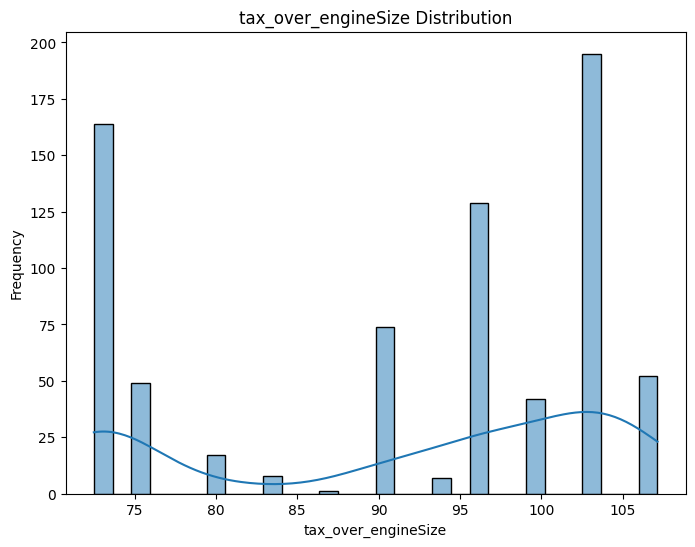

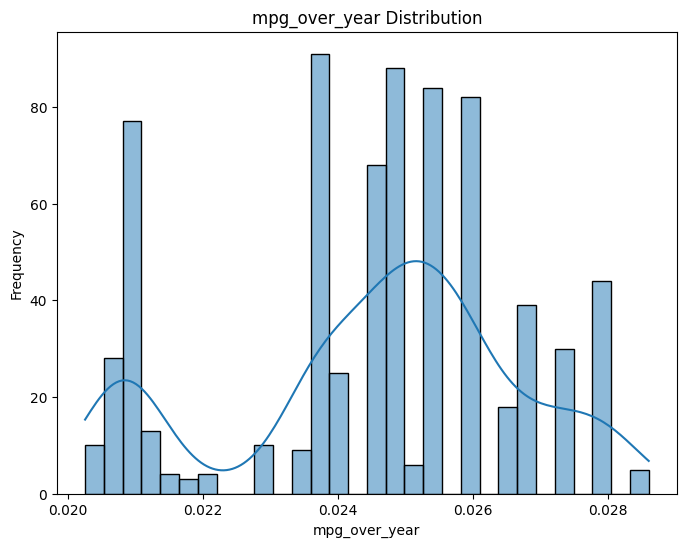

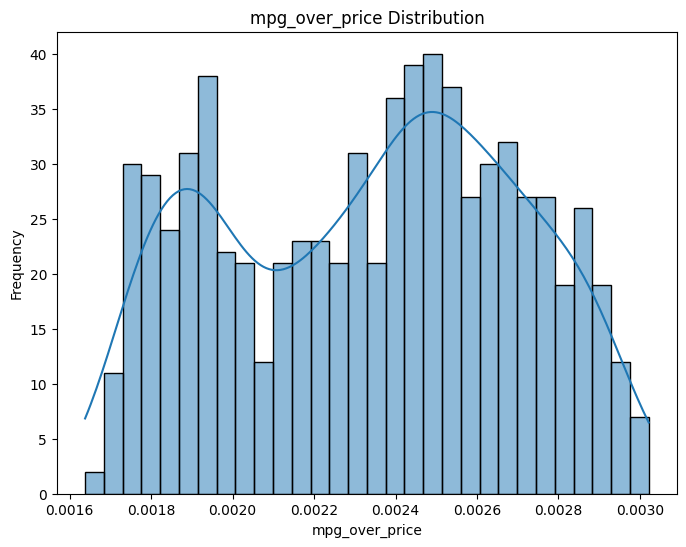

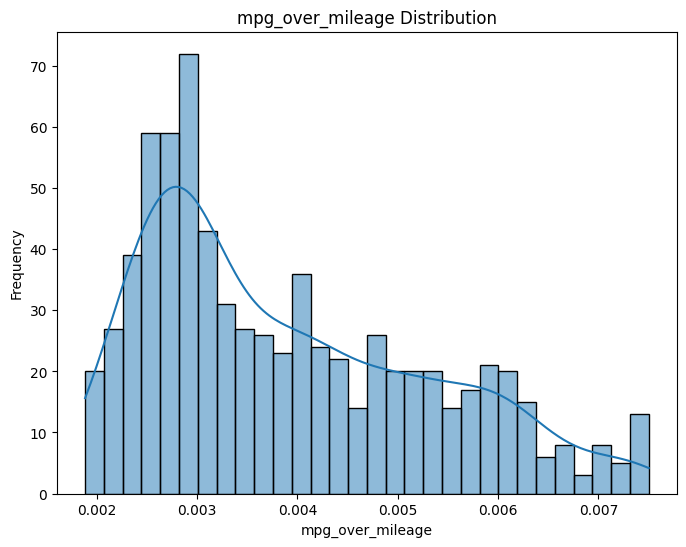

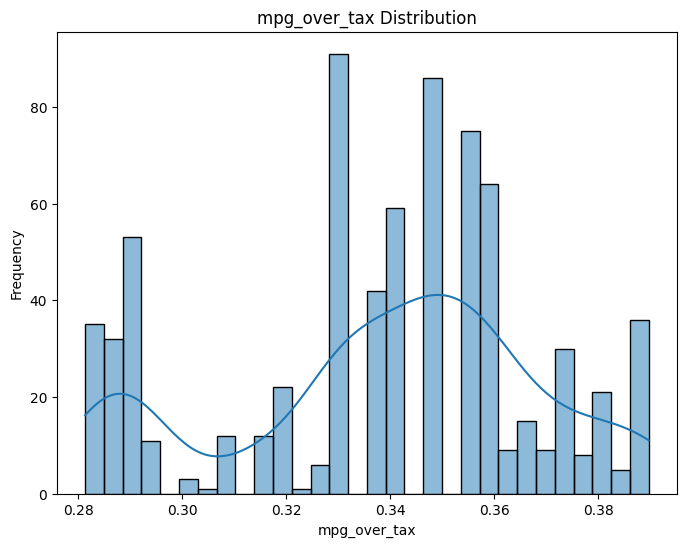

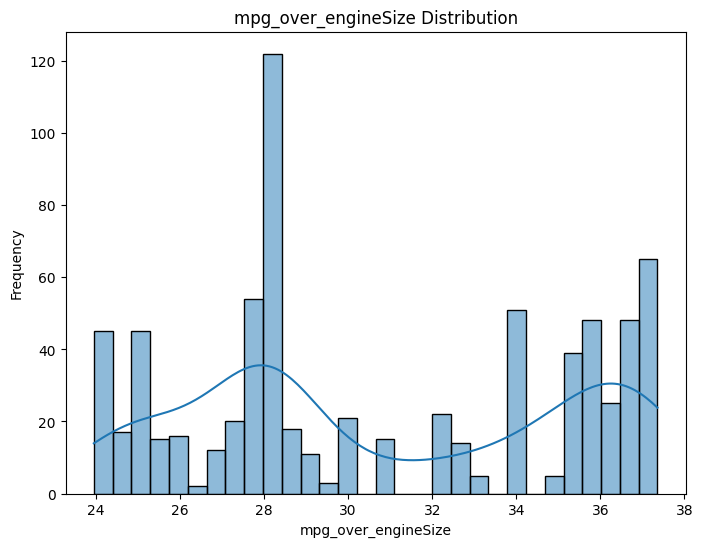

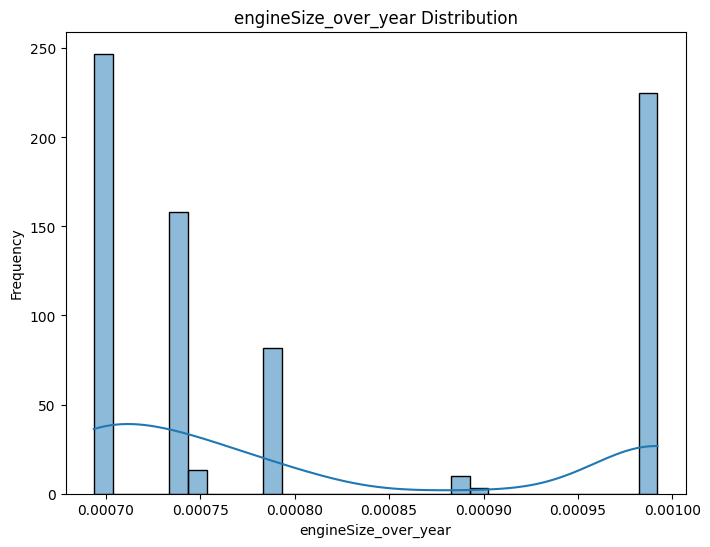

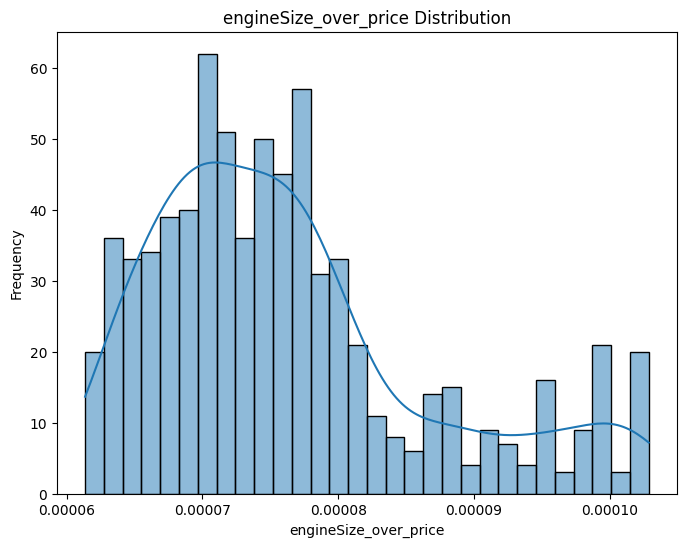

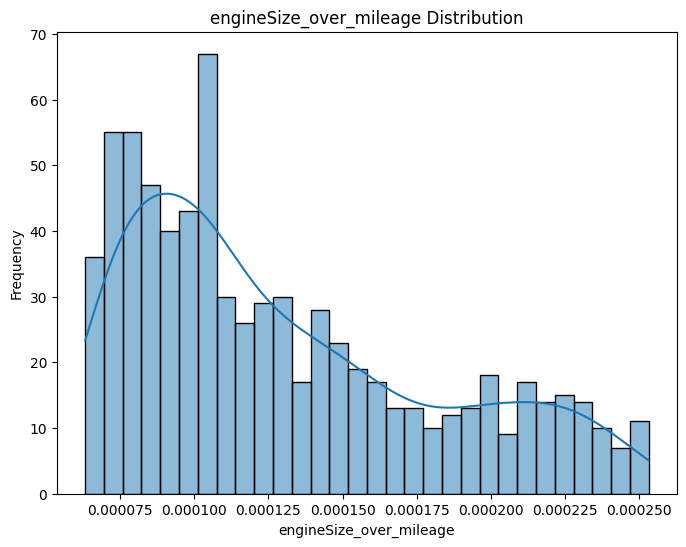

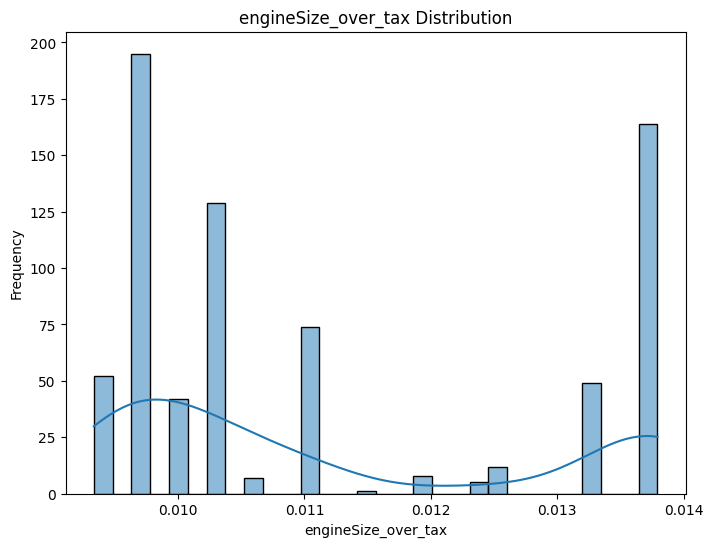

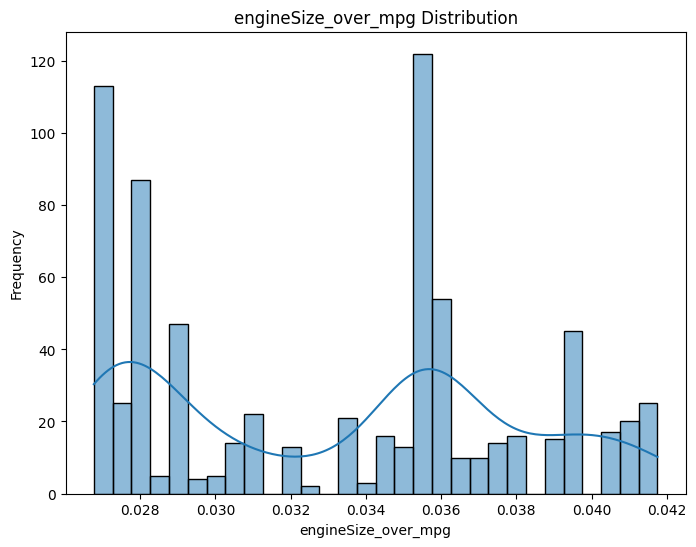

In [23]:
# Sayısal sütunları seçme
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Yeni özellikler oluşturma ve hepsini bir listede toplama
new_columns = {}
for i, col1 in enumerate(numerical_columns):
    for j, col2 in enumerate(numerical_columns):
        if i != j:  # Aynı sütunu kendisiyle bölmeyi engeller
            new_col_name = f'{col1}_over_{col2}'
            new_columns[new_col_name] = df[col1] / df[col2]

# Yeni sütunları DataFrame'e ekleyin
df_new = pd.concat([df, pd.DataFrame(new_columns)], axis=1)

# Aykırı değerleri inceleyin ve gerektiğinde düzeltin
for col in new_columns:
    alt_sinir = df_new[col].quantile(0.05)
    ust_sinir = df_new[col].quantile(0.95)
    df_new = df_new[(df_new[col] >= alt_sinir) & (df_new[col] <= ust_sinir)]

# Pandas ayarlarını değiştirerek daha fazla satır ve sütun göster
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)  # Yan yana sütunları göster

# DataFrame'in ilk ve son birkaç satırını görüntüleme
print("First Few Rows:")
print(df_new.head().to_string(index=False))
print("\nLast Few Rows:")
print(df_new.tail().to_string(index=False))

# Eksik değerleri kontrol edin ve sayısını yazdırın
for col in new_columns:
    print(f"{col} has {df_new[col].isnull().sum()} missing values")

# Yeni sütun isimlerini al
new_column_names = list(new_columns.keys())

# Tüm oranların grafiğini çiz
for column_name in new_column_names:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df_new, x=column_name, bins=30, kde=True)
    plt.title(f'{column_name} Distribution')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()




8. Modelleme ve Değerlendirme:
EDA ve veri ön işleme adımlarını tamamladıktan sonra, veri setini modelleme aşamasına geçebiliriz. Bu adımda, çeşitli makine öğrenimi algoritmalarını kullanarak veri seti üzerinde modeller oluşturacağız ve bu modelleri değerlendireceğiz.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Veri setini eğitim ve test olarak ayırın
X = df[['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['year']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model oluşturma ve eğitme
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Tahmin yapma
y_pred_log = log_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Model değerlendirme
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred_log))
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_rf))

print("Confusion Matrix (Logistic Regression):\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_log))

print("Confusion Matrix (Random Forest):\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))




c:\Users\turko\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy:  0.5126522961574508
Random Forest Accuracy:  0.9943767572633552
Confusion Matrix (Logistic Regression):
 [[  0   0   0   0   1   0   0   1   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0]
 [  0   0   0   0   1   0   0   1   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   1   0   1   0   2   0   1   0   0   0]
 [  0   0   0   0   2   0   1   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   1   1   0   3   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   5   0   2   1   0   0   0   0]
 [  0   0   0   0   1   0   0   1   0   4   0   2   4   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   2   0  10   7   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   2   0  16  28   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   3   0  22  58   9   0   0   0]
 [  0   0   0   0   0   0   0   1   0   8   0  19 143  29   1   3   0]
 [  0   0   0

c:\Users\turko\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\turko\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\turko\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

9. Model İyileştirme:
Modelin performansını artırmak için hiperparametre optimizasyonu ve çapraz doğrulama gibi yöntemler kullanılabilir.

In [25]:
from sklearn.model_selection import GridSearchCV

# Hiperparametre optimizasyonu (örneğin, RandomForest için)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# En iyi parametrelerle modeli yeniden eğitme
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
print("Optimized Random Forest Accuracy: ", accuracy_score(y_test, y_pred_best_rf))


Fitting 3 folds for each of 108 candidates, totalling 324 fits


c:\Users\turko\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best parameters found:  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score:  0.9923833524076011
Optimized Random Forest Accuracy:  0.992970946579194


10. Model Doğrulama:
Modelin doğruluğunu ve genelleme kabiliyetini doğrulamak için çapraz doğrulama gibi teknikler kullanılır.

In [26]:
from sklearn.model_selection import cross_val_score

# Çapraz doğrulama ile model değerlendirme
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", cv_scores.mean())


c:\Users\turko\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores:  [0.99250234 0.99484536 0.99343955 0.99343647 0.99343647]
Mean cross-validation score:  0.9935320405762791


11. Sonuçların Raporlanması ve Sunumu:
Analiz sonuçlarını ve model performansını anlaşılır bir şekilde raporlamak ve sunmak önemlidir. Bu adımda, elde edilen bulguları ve sonuçları özetleyen raporlar ve görselleştirmeler hazırlanabilir.

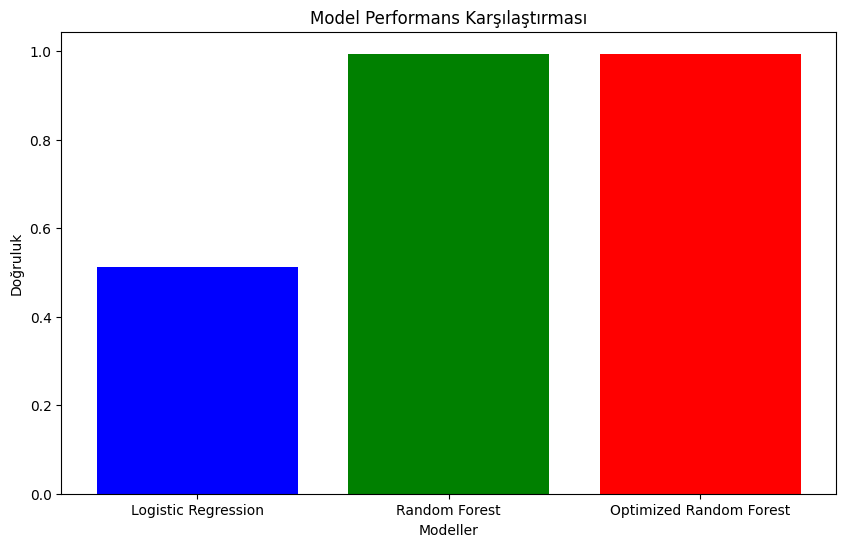

Model Performans Özeti:
Logistic Regression Accuracy: 0.5127
Random Forest Accuracy: 0.9944
Optimized Random Forest Accuracy: 0.9930


In [27]:
import matplotlib.pyplot as plt

# Eğitim ve test doğruluklarının görselleştirilmesi
models = ['Logistic Regression', 'Random Forest', 'Optimized Random Forest']
accuracies = [accuracy_score(y_test, y_pred_log), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_best_rf)]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Modeller')
plt.ylabel('Doğruluk')
plt.title('Model Performans Karşılaştırması')
plt.show()

# Özet rapor
print("Model Performans Özeti:")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Optimized Random Forest Accuracy: {accuracy_score(y_test, y_pred_best_rf):.4f}")
